# Part I - Prosper Loan Data Exploration
## by Isaac Godwin

## Introduction
     This notebook document explores a dataset which contain 113,937 loan records in 81 colomns. The dataset which is a prosper loan data that was provided by Udacity for the porpose of this project.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
import warnings
warnings.simplefilter("ignore")

> Loading the dataset in order to describe its properties.

In [2]:
loan_df = pd.read_csv('prosperloandata.csv')
loan_df.shape

(113937, 81)

In [3]:
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loan_df.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of the dataset?

    The dataset contains 113937 observations with 81 variables on each loan records

### What is/are the main feature(s) of interest in the dataset?

    The main variables of interest in this dataset are the ones with discriptive information related to the profile of the borrowers and the loan borrowed.

### What features in the dataset  will help support the investigation into the feature(s) of interest?

    Some of the variables to explore in order to investigate the relationship between the variable of interest which are the borrowers informations and the loan they borrowed. they are; EmploymentStatus, Occupation, StatedMonthlyIncome, BorrowerAPR, BorrowerRate, BorrowerState, DebtToIncomeRatio, LoanStatus, LoanOriginalAmount, LoanOriginationDate, TotalProsperLoans, IncomeVerifiable,

## Univariate Exploration

Each variable will be exploired in this section

In [7]:
# subseting the data frame by selecting variable of interest
col = ['EmploymentStatus', 'Occupation', 'StatedMonthlyIncome','BorrowerState',  'BorrowerAPR', 'BorrowerRate', 'LoanStatus',
        'IncomeVerifiable', 'DebtToIncomeRatio', 'IsBorrowerHomeowner', 'LoanOriginalAmount', 'IncomeRange', 'LoanOriginationDate',
       'ProsperRating (Alpha)', 'Term','TotalProsperLoans']
loan_subset = loan_df[col]
loan_subset.head()

,EmploymentStatus,Occupation,StatedMonthlyIncome,BorrowerState,BorrowerAPR,BorrowerRate,LoanStatus,IncomeVerifiable,DebtToIncomeRatio,IsBorrowerHomeowner,LoanOriginalAmount,IncomeRange,LoanOriginationDate,ProsperRating (Alpha),Term,TotalProsperLoans
0,Self-employed,Other,3083.333333,CO,0.16516,0.1580,Completed,True,0.17,True,9425,"$25,000-49,999",2007-09-12 00:00:00,NaN,36,NaN
1,Employed,Professional,6125.000000,CO,0.12016,0.0920,Current,True,0.18,False,10000,"$50,000-74,999",2014-03-03 00:00:00,A,36,NaN
2,Not available,Other,2083.333333,GA,0.28269,0.2750,Completed,True,0.06,False,3001,Not displayed,2007-01-17 00:00:00,NaN,36,NaN
3,Employed,Skilled Labor,2875.000000,GA,0.12528,0.0974,Current,True,0.15,True,10000,"$25,000-49,999",2012-11-01 00:00:00,A,36,NaN
4,Employed,Executive,9583.333333,MN,0.24614,0.2085,Current,True,0.26,True,15000,"$100,000+",2013-09-20 00:00:00,D,36,1.0


In [8]:
# shape of the dataframe
loan_subset.shape

(113937, 16)

In [9]:
# checking loan statistics
loan_subset.describe()

,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,DebtToIncomeRatio,LoanOriginalAmount,Term,TotalProsperLoans
count,1.139370e+05,113912.000000,113937.000000,105383.000000,113937.00000,113937.000000,22085.000000
mean,5.608026e+03,0.218828,0.192764,0.275947,8337.01385,40.830248,1.421100
std,7.478497e+03,0.080364,0.074818,0.551759,6245.80058,10.436212,0.764042
min,0.000000e+00,0.006530,0.000000,0.000000,1000.00000,12.000000,0.000000
25%,3.200333e+03,0.156290,0.134000,0.140000,4000.00000,36.000000,1.000000
50%,4.666667e+03,0.209760,0.184000,0.220000,6500.00000,36.000000,1.000000
75%,6.825000e+03,0.283810,0.250000,0.320000,12000.00000,36.000000,2.000000
max,1.750003e+06,0.512290,0.497500,10.010000,35000.00000,60.000000,8.000000


### what are the EmploymentStatus of the borrowers

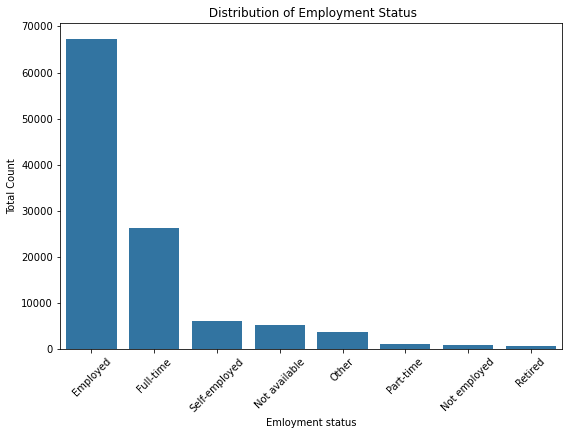

In [10]:
#checking the Borrower's employment status
plt.figure(figsize = [9, 6])
color_pal = sb.color_palette()[0]
employ = loan_subset['EmploymentStatus'].value_counts().index
sb.countplot(data= loan_subset, x= 'EmploymentStatus', color = color_pal, order = employ)
plt.title(" Distribution of Employment Status")
plt.xlabel('Emloyment status')
plt.ylabel('Total Count')
plt.xticks(rotation = 45);

From data it shows that most of the borrowers were either Employed, full-time, self employed, the employment status is not available or other

### what are the occupations of most of the borrowers 

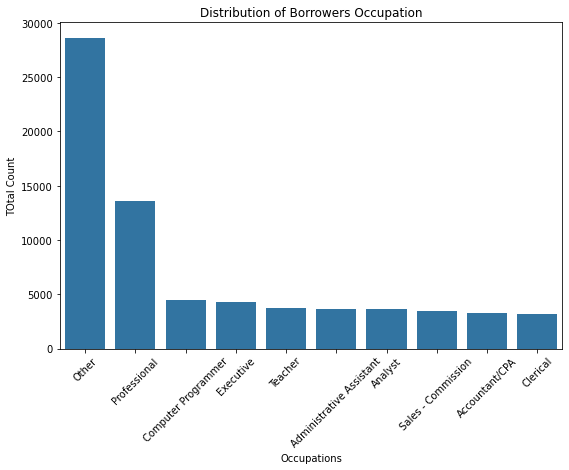

In [11]:
#checking the borrowers occupations
plt.figure(figsize = [9, 6])
color_pal = sb.color_palette()[0]
order = loan_subset['Occupation'].value_counts().iloc[:10].index
sb.countplot(data= loan_subset, x= 'Occupation', color = color_pal, order = order)
plt.title("Distribution of Borrowers Occupation")
plt.xlabel('Occupations')
plt.ylabel('TOtal Count')
plt.xticks(rotation = 45);

The chart shows that most of the occupation of the borrowers are others which is an indication that most of their occupation are outside the options provided

#### How is the loan distributed by BorrowerState

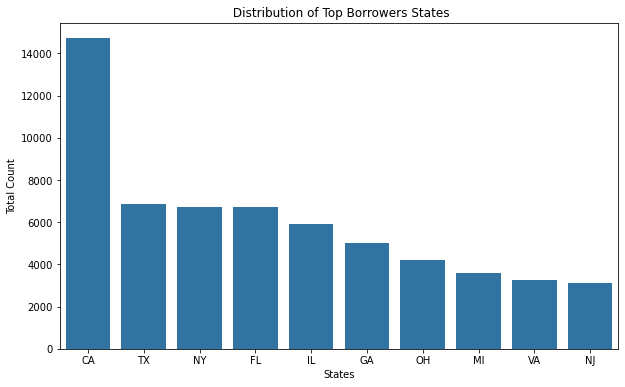

In [12]:
plt.figure(figsize = [10, 6])
color_pal = sb.color_palette()[0]

b_state = loan_subset['BorrowerState'].value_counts().iloc[:10].index
sb.countplot(data= loan_subset, x= 'BorrowerState', color = color_pal, order = b_state)
plt.title(" Distribution of Top Borrowers States")
plt.xlabel('States')
plt.ylabel('Total Count');

from the data it show that the highest distribution of borrowers states is CA, follows by TX, NY, FL and IL.

### the Stated Monthly Income of the borrowers

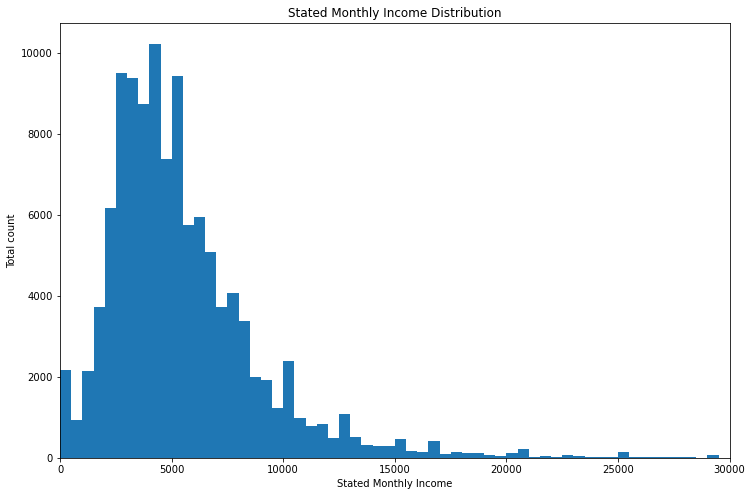

In [13]:
# creating a Histogram to show the Stated Monthly Income the Borrower
plt.figure(figsize = [12, 8])
bin_edges= np.arange(0, loan_subset['StatedMonthlyIncome'].max()+500, 500)
plt.hist(data= loan_subset, x = 'StatedMonthlyIncome', bins= bin_edges)
plt.xlim(0, 30000)
plt.xlabel('Stated Monthly Income')
plt.ylabel('Total count')
plt.title('Stated Monthly Income Distribution');

From the data displayed, it shows that the distribution of stated monthly income is right-skewed. in which most stated monthly income are less than 30k.

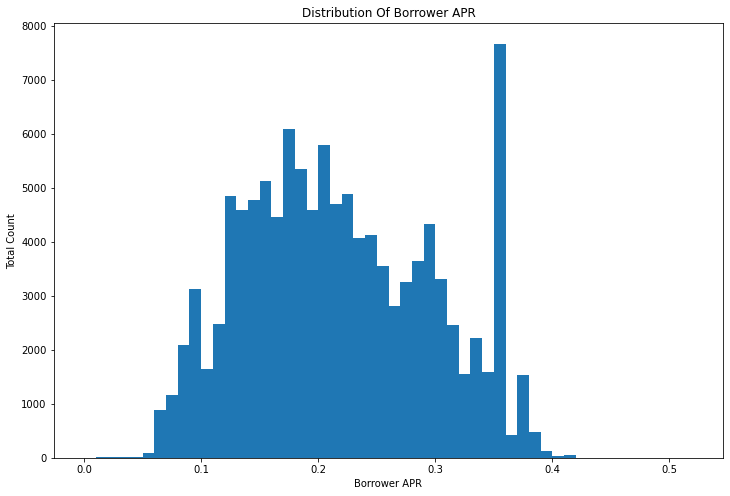

In [14]:
# creating a histogram to show the distribution of the borrowers APR
plt.figure(figsize = [12, 8])
bin_edge = np.arange(0, loan_subset.BorrowerAPR.max() + 0.01, 0.01)
plt.hist(data = loan_subset, x = 'BorrowerAPR', bins = bin_edge)
plt.xlabel('Borrower APR')
plt.ylabel('Total Count')
plt.title('Distribution Of Borrower APR');

From the distribution it shows that the peak was at 0.2. afterward, it goes on a downward trend with a peak at 0.3 and a sudden rise at 0.35.

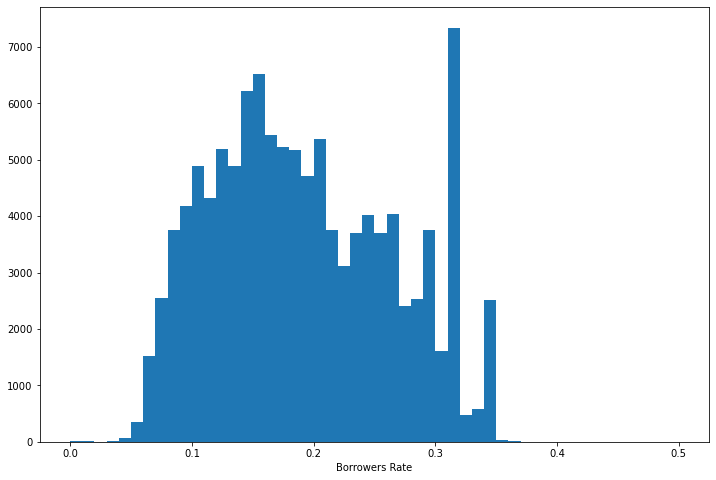

In [15]:
# creating an Histogram to show the distribution of the Borrower's Rate
plt.figure(figsize = [12, 8])
bin_edge= np.arange(0, loan_subset['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data= loan_subset, x = 'BorrowerRate', bins= bin_edge)
plt.xlabel('Borrowers Rate');

The distribution shows almost identical to that of BorrowerAPR. with The peak around 0.15 and there is another peak a little over 0.3, which happens to be the highest peak.

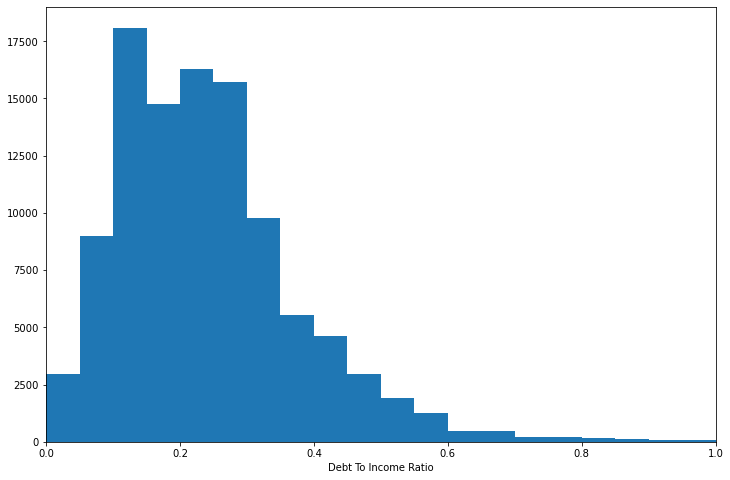

In [16]:
# creating an Histogram to show the distribution of the Borrower's DebtToIncomeRatio
plt.figure(figsize = [12, 8])
bin_edge= np.arange(0, loan_subset['DebtToIncomeRatio'].max()+0.05, 0.05)
plt.hist(data= loan_subset, x = 'DebtToIncomeRatio', bins= bin_edge)
plt.xlim(0, 1)
plt.xlabel('Debt To Income Ratio');

The plot shows that debt to income ratio is skewed to the right

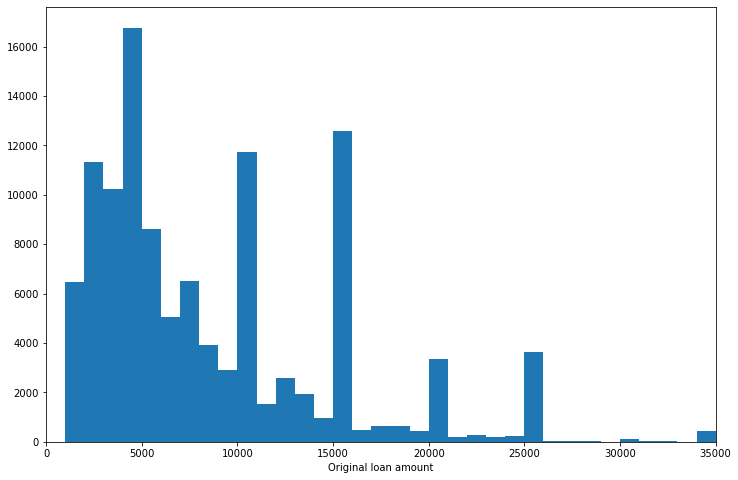

In [17]:
# creating an Histogram to show the distribution of the original loan amount
plt.figure(figsize = [12, 8])
bin_edge= np.arange(0, loan_subset['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data= loan_subset, x = 'LoanOriginalAmount', bins= bin_edge)
plt.xlim(0, 35000)
plt.xlabel('Original loan amount');

The original loan amount distribution shows a very large spikes at 5k, 10k, 15k, 20k, 25k respectively.

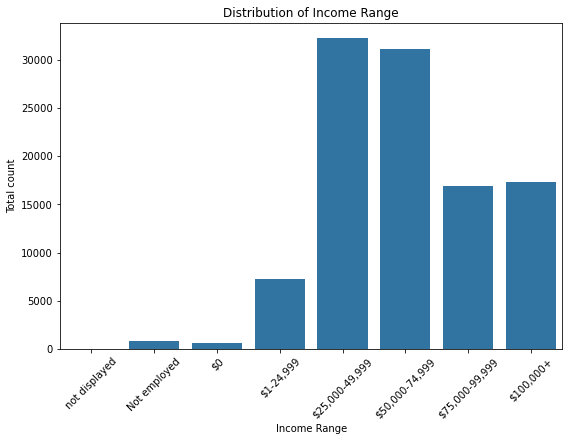

In [18]:
# Creating a barchart to show the distribution of IncomeRange 
plt.figure(figsize = [9, 6])
color_pal = sb.color_palette()[0]
order_type = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', 
              '$50,000-74,999','$75,000-99,999', '$100,000+']
sb.countplot(data= loan_subset, x = 'IncomeRange', color = color_pal, order = order_type)
plt.title("Distribution of Income Range")
plt.xlabel("Income Range")
plt.ylabel("Total count")
plt.xticks(rotation = 45);

The distribution indicated that Most of the borrowers have income between the range of ($)25,000-74,999

In [19]:
# creating month and year columns from LoanOriginationDate
loan_subset['Month']= pd.DatetimeIndex(loan_subset['LoanOriginationDate']).month
loan_subset['Year']= pd.DatetimeIndex(loan_subset['LoanOriginationDate']).year

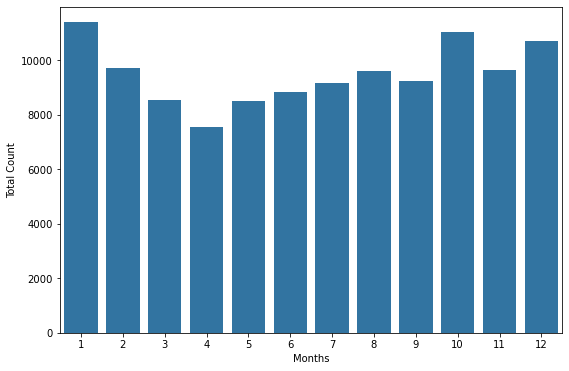

In [20]:
#creating bar chart to show the distribution of loans across months
plt.figure(figsize = [9, 6])
color_pal = sb.color_palette()[0]
sb.countplot(data= loan_subset, x = 'Month', color = color_pal)
plt.xlabel("Months")
plt.ylabel("Total Count");

from the distribution there are no clear indication that a particular month are the most time of loan. but it can be said that january, october,december and february has the highest

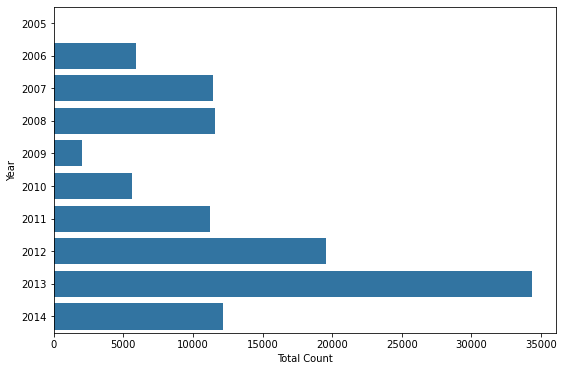

In [21]:
#creating bar chart to show the years distribution 
plt.figure(figsize = [9, 6])
color_pal = sb.color_palette()[0]
sb.countplot(data= loan_subset, y= 'Year', color = color_pal)
plt.xlabel("Total Count")
plt.ylabel('Year');

The data shows that Vast majority of the loans were taken in 2013

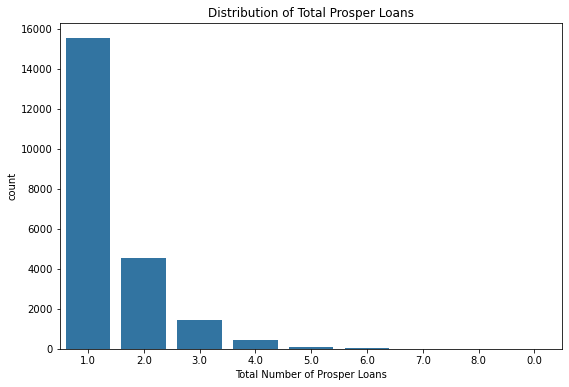

In [22]:
#creating bar chart to show the distribution of total number of loans collected by borrowers
plt.figure(figsize = [9, 6])
color_pal = sb.color_palette()[0]
num_of_loan = loan_subset['TotalProsperLoans'].value_counts().index
sb.countplot(data= loan_subset, x = 'TotalProsperLoans', color = color_pal, order = num_of_loan)
plt.xlabel('Total Number of Prosper Loans');
plt.title("Distribution of Total Prosper Loans");

The distribution shows that most borrowers who apply for a loan have only a single prosper loan

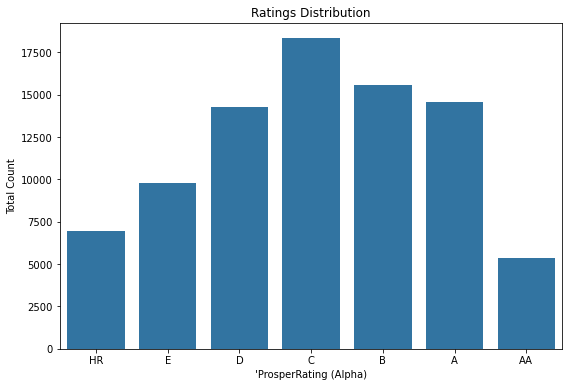

In [23]:
plt.figure(figsize = [9, 6])
color_pal = sb.color_palette()[0]
rating_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
sb.countplot(data= loan_subset, x= 'ProsperRating (Alpha)', color = color_pal, order = rating_order)
plt.title('Ratings Distribution')
plt.xlabel("'ProsperRating (Alpha)")
plt.ylabel("Total Count");

It seems that most borrowers has the ratings, A-D. with C having the highest number of ratings

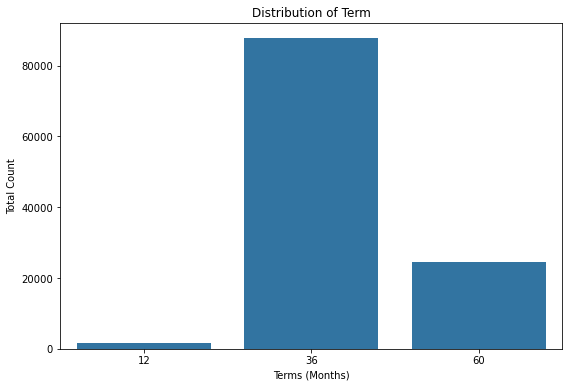

In [24]:
#creating bar chart to show the loan terms distribution
plt.figure(figsize = [9, 6])
color_pal = sb.color_palette()[0]
order_type = [12, 36, 60]
sb.countplot(data= loan_subset, x= 'Term', color = color_pal, order = order_type)
plt.title("Distribution of Term")
plt.xlabel("Terms (Months)")
plt.ylabel("Total Count");

The distribution shows that the duration (Terms) of most of the loans are 36 months

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

   looking at the variables of interest,It was observed that most of the borrowers were employed and fultime, looking further to their occupations and it was observed that vast majority of the borrowers occupations were OTHERS which was an indication that thier occupation were not amongs the ones listed, i looked at Borrower's state and discovered CA has the highest borrowers and Their monthly income distribution is skewed to the right and they are usually less than 30k. Their income ratio is right skewed. The distribution also shows that the borrowers APR peak at 0.2 afterward it went on a downward trend and then peak at 0.3 and a suden spike at 0.35.i look at the borrower Rate, it has a similar distribution as the borrower APR with peak at around 0.15 and a little over 0.3 as well as their income range which mostly ranges from 25,000-74,999. Their monthly income distribution is skewed to the right and they are usually less than 30k. Their income ratio is right skewed. Most of the loans have a loan term of 36 months, instead of 12 or 60 months.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

  I reorder the ProsperRating (Alpha) ratings and I extracted the months and years of the loans from the loan original date and I discovered alot of loans were taken in 2013.

## Bivariate Exploration

Numeric Variables and categorical Variables

In [25]:
numeric_vars = [ 'LoanOriginalAmount','StatedMonthlyIncome', 'BorrowerRate']
categoric_vars = ['IncomeRange', 'EmploymentStatus', 'Term', 'Year', 'IsBorrowerHomeowner']

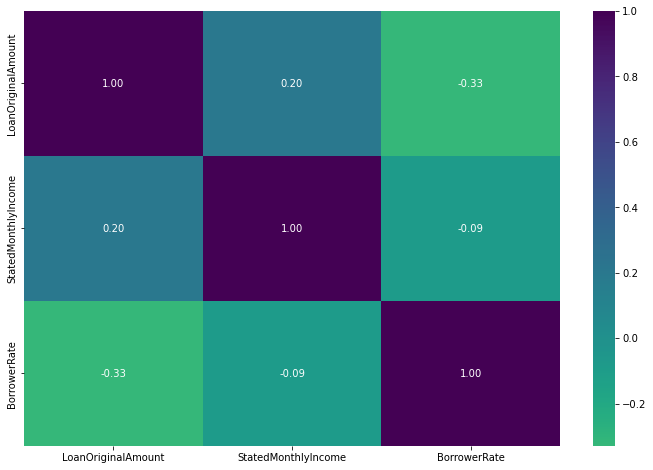

In [26]:
# showing correlation using a heatmap plot
plt.figure(figsize = [12, 8])
sb.heatmap(loan_subset[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'viridis_r', center = 0);

 * From the heatmap it shows that Loan original amount and borrowers rate are nagatively correleted with a value of  - 0.33 this indicated that the higer the borrower original amount the lowre the borrower rate on the loan. 
 * It also reveal that stated monthly income and loan original amount  were positively correlated with a value point of 0.20 this indicated that the the higer the monthly income stated by the borrower the higher the loan gotten.
 *  However there is a low and nagative The correlation between stated monthly income and borrower rate with a value of -0.09.


loan_subset.shape= (113937, 18)
loan_subset_samp.shape= (500, 18)


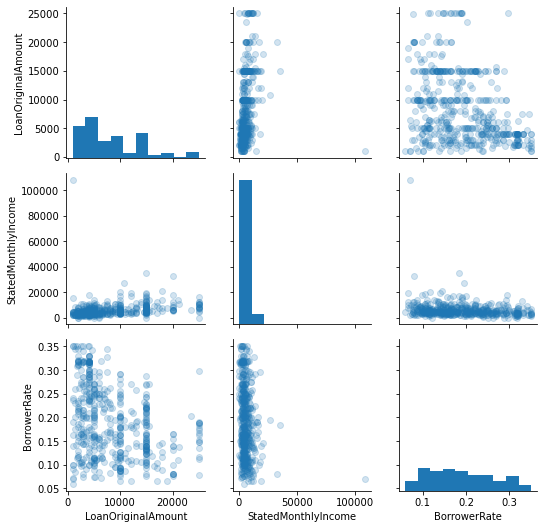

In [27]:
# plot matrix: sample 500 observation so that plots are clearer and they render faster
print("loan_subset.shape=",loan_subset.shape)
loan_subset_samp = loan_subset.sample(n=500, replace = False)
print("loan_subset_samp.shape=",loan_subset_samp.shape)

g = sb.PairGrid(data = loan_subset_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 10);
g.map_offdiag(plt.scatter , alpha = 1/5);

* The loan original amount is positively correlated with the stated monthly income.
* The borrowerRate is negatively correlated with loan amount.

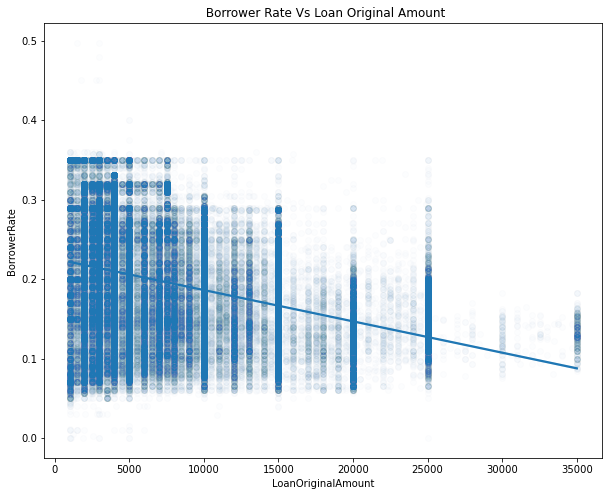

In [28]:
# looking at how borrowerRate and loan original amount are related to one another for all of the data
plt.figure(figsize = [10, 8])
sb.regplot(data = loan_subset, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':0.01})
plt.title(' Borrower Rate Vs Loan Original Amount');

the plots indicated that at different size of the loan amount, the BorrowerRate has a large range, but the range of BorrowerRate decrease with the increase of loan amount.

<Figure size 864x576 with 0 Axes>

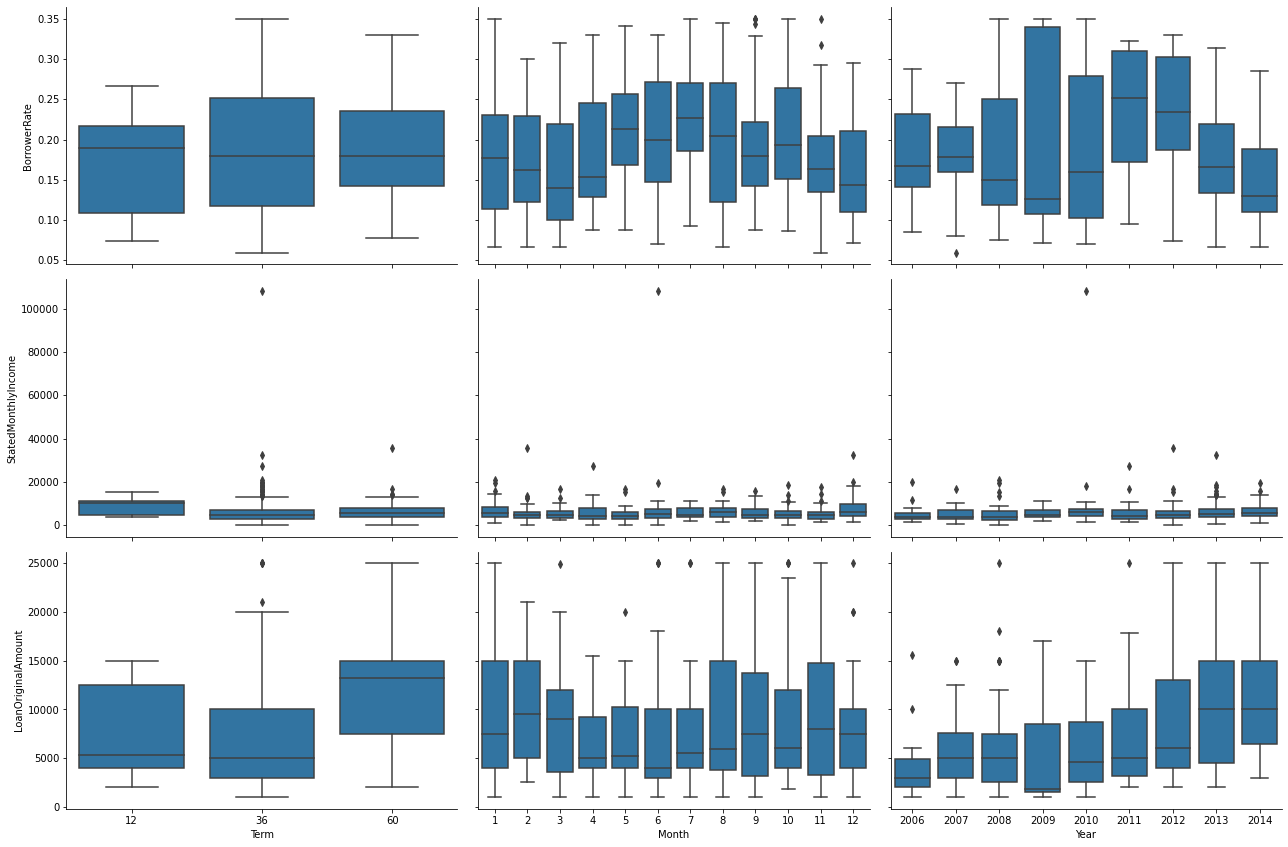

In [29]:
#Looking at how borrower Rate, stated monthly income and loan original amount correlate with the categorical variables.
#plotting matrix of numeric features against categorical features.
categorical_vars = ['Term', 'Month','Year']
#def boxgrid function
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [12, 8])
g = sb.PairGrid(data = loan_subset_samp, y_vars = ['BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = categorical_vars, height = 4, aspect = 1.5)
g.map(boxgrid);

from the visuals is can be observed that thereare a strong positive relationship between term and loan amount that is the longer the loan term, the larger the loan
I observed that in 2009 there was a large dip in loan origination then went back up in 2013.

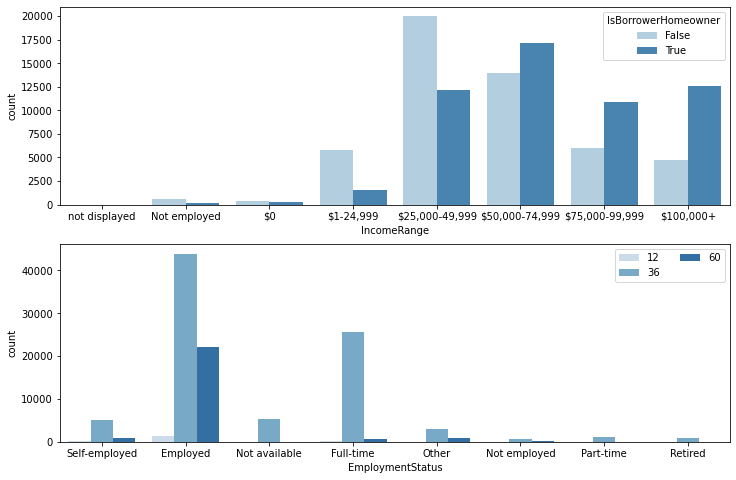

In [30]:
#further investigation into relationship between variables
plt.figure(figsize = [12, 8])
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
# subplot 1: Income Range vs Is BorrowerHomeowner
plt.subplot(2, 1, 1)
sb.countplot(data = loan_subset, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', order=order, palette = 'Blues')

# subplot 2: employment status vs. term
ax = plt.subplot(2, 1, 2)
sb.countplot(data = loan_subset, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')

ax.legend(loc = 1, ncol = 2); 

* Borrowers with income range from ($)50,000-100,000+ are mostly homeowners
* Borrowers with full time employment status tend to take loans with term duration of 12months while 
* Borrowers that Employed tend to take loans of term duration as 36 months

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The borrower interest Rate is negatively correlated with the loan original amount, which mean the more the loan amount, the lower the Borrower Rate. It also shows that at different size of the loan amount, the Rate has a large range, but the range of interest Rate decrease with the increase of loan amount. The loan original amount is positively correlated with the stated monthly income. That is, the higher their stated monthly income, the higher the loan amount borrowed. Borrowers with verified income tend to have a higher average loan amount than borrowers without verified income. Borrowers who are employed and fulltime on average take out larger loans than other groups.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I observed that Borrowers with income ranging from ($)50,000-100,000+ aremostly homeowners and also
Borrowers with full time employment status tend to take loans with term duration of 12 months
Employed borrowers tend to take loans of term duration as 36months. i also observed that
from the visuals is can be observed that thereare a strong positive relationship between term and loan amount that is the longer the loan term, the larger the loan I observed that in 2009 there was a large dip in loan origination then went back up in 2013.

## Multivariate Exploration

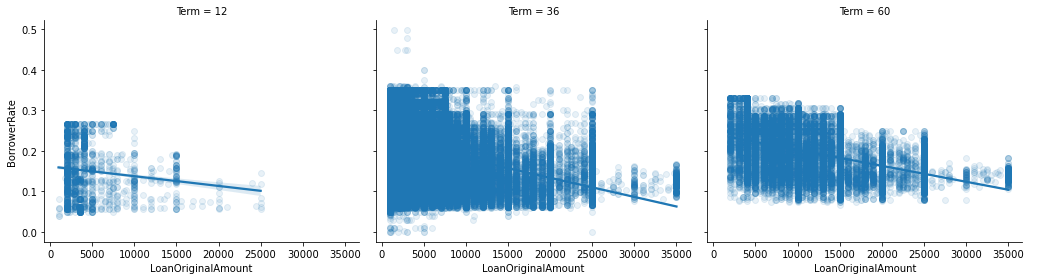

In [31]:
# investigating further the Term effect on relationship of BorrowerRate and loan amount
g=sb.FacetGrid(data=loan_subset, aspect=1.2, height=4, col='Term', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

    Its shows that Term doesnt really seem to have effect on the relationship between borrower rate and loan original amount

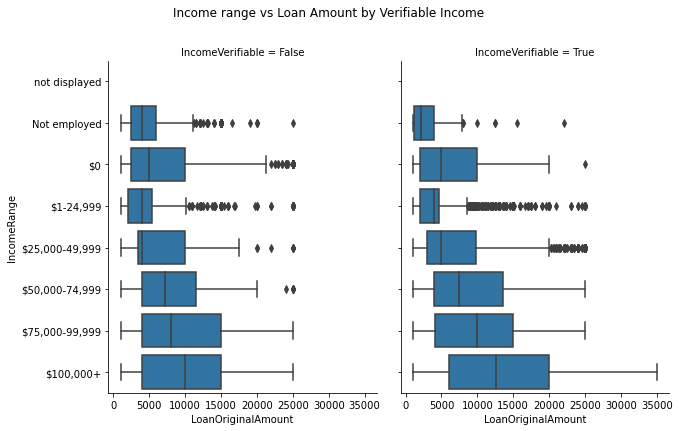

In [32]:
# investigating the effect a verified income has on the relationship between loan original amount and income range
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
box= sb.FacetGrid(data= loan_subset, col = 'IncomeVerifiable', height = 4)
box.map(sb.boxplot, 'LoanOriginalAmount', 'IncomeRange', order = order)
plt.suptitle('Income range vs Loan Amount by Verifiable Income', y = 1.04)
box.fig.set_size_inches(10,6);

    The data shows that those who earn 100,000+ and have verified their income tend to get larger loan original amount than those whose income are not verifiable. The borrowers with verified incomes tend to get higher loan amounts.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
    Term does'nt really seem to have effect on the relationship between borrower rate and loan original amount

### Were there any interesting or surprising interactions between features?
    The data shows that those who earn 100,000+ and have verified their income tend to get larger loan original amount than those whose income are not verifiable. The borrowers with verified incomes tend to get higher loan amounts.


## Conclusions

   For this exploratory analysis, my main interest was to analyze the information related to the profile of the borrowers and the loan borrowed.
   Exploring the distribution of uni variables of interest, one of the insightful information discovered was that most of the borrowers were employed and fultime, looking also further to their occupations and it was observed that vast majority of the borrowers occupations were OTHERS which was an indication that thier occupation were not amongs the ones listed, i looked at Borrower's state and discovered CA (califonia) has the highest borrowers and Their monthly income distribution is skewed to the right and they are usually less than 30k. the borrowers income mostly ranges from 25,000-74,999. Their monthly income distribution is skewed to the right and they are usually less than 30k. Their income ratio is right skewed. Most of the loans have a loan term of 36 months, instead of 12 or 60 months.when i extracted the months and years of the loans from the loan original date and I discovered alot of loans were taken in 2013.
    Investigating further to observe the relationships between 2 variables each of the data, then i discovered that the borrower interest Rate is negatively correlated with the loan original amount, which mean the more the loan amount, the lower the Borrower Rate. It also shows that at different size of the loan amount, the Rate has a large range, but the range of interest Rate decrease with the increase of loan amount. The loan original amount is positively correlated with the stated monthly income. That is, the higher their stated monthly income, the higher the loan amount borrowed. Borrowers with verified income tend to have a higher average loan amount than borrowers without verified income. Borrowers who are employed and fulltime on average take out larger loans than other groups. I observed that Borrowers with income ranging from 50,000-100,000+ aremostly homeowners and also Borrowers with full time employment status tend to take loans with term duration of 12 months Employed borrowers tend to take loans of term duration as 36months. i also observed that from the visuals is can be observed that thereare a strong positive relationship between term and loan amount that is the longer the loan term, the larger the loan I observed that in 2009 there was a large dip in loan origination then went back up in 2013.
    Further investigation using multiple variables,i found out that loan term doesn't really seems to have an effect on the relationship between borrower rate and loan original amount and i also observed that those who earn 100,000+ and have verified their income tend to get larger loan original amount than those whose income are not verifiable. The borrowers with verified incomes tend to get higher loan.

   The major challenge faced in this project was deciding on which variables of interest to really focus on as the loan dataset has 81 variables. 

   I referenced Stackoverflow and Udacity platform  and other online platforms in the course of working on this projects.